## B2W Digital
#### We are Hiring - Desafio Inteligência Artifical / FRONT

Link: 

https://github.com/b2wdigital/We-are-Hiring/tree/master/desafios-ia-front/clusters-sapatos 


#### Desafio - Agrupar produtos na visão do usuário

#### Entregáveis: 
* Você deve usar o algoritmo de sua preferência para agrupar os sapatos de acordo com condition, categories e colors disponíveis gerando 4 clusters.

* Para cada cluster encontrado, você deve calcular o preço médio e o desvio padrão de preço.

* Como bônus, você pode apresentar os clusters num gráfico, mas essa etapa não é obrigatória.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans   

%matplotlib inline 

In [2]:
!pip install category_encoders

In [0]:
from category_encoders.one_hot import OneHotEncoder 

In [0]:
df = pd.read_json('https://raw.githubusercontent.com/b2wdigital/We-are-Hiring/master/desafios-ia-front/clusters-sapatos/shoes.json#', orient="values", lines=True)

In [5]:
df.head()

,id,brand,categories,colors,condition,isSale,price
0,AVpfEf_hLJeJML431ueH,Naturalizer,"[Clothing, Heels, All Women's Shoes, Shoes, Sa...","[Silver, Cream]",USED,False,55.990
1,AVpi74XfLJeJML43qZAc,MUK LUKS,"[Clothing, All Women's Shoes, Women's Casual S...",[Grey],NEW,True,41.125
2,AVpi74XfLJeJML43qZAc,MUK LUKS,"[Clothing, All Women's Shoes, Women's Casual S...",[Grey],NEW,False,35.250
3,AVpjXyCc1cnluZ0-V-Gj,MUK LUKS,"[Clothing, All Women's Shoes, Shoes, Women's S...",[Black],NEW,False,24.750
4,AVphGKLPilAPnD_x1Nrm,MUK LUKS,"[Clothing, All Women's Shoes, Shoes, Women's S...",[Grey],NEW,True,31.695


In [6]:
df.tail()

,id,brand,categories,colors,condition,isSale,price
9995,AWKcCm-RHh53nbDRIh1_,Asics,"[Women's Running Shoes, Women's Footwear, Wome...",[Silver],NEW,True,104.955
9996,AWKcEq-dHh53nbDRIiES,Asics,"[Women's Running Shoes, Women's Footwear, Wome...",[Indigo],NEW,True,98.960
9997,AWKb5jmLYSSHbkXwyzBA,Kaanas,"[Women's Casual Boots & Shoes, Women's Footwea...",[Mauve],NEW,True,96.710
9998,AWKcEIInYSSHbkXwy0SA,Nike,"[Women's Running Shoes, Women's Footwear, Wome...",[Armory],NEW,True,104.955
9999,AWKb6PiKYSSHbkXwyzP-,OTZShoes,"[Women's Casual Boots & Shoes, Women's Footwea...",[Black],NEW,True,74.960


In [7]:
df.shape

(10000, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
id            10000 non-null object
brand         10000 non-null object
categories    10000 non-null object
colors        10000 non-null object
condition     10000 non-null object
isSale        10000 non-null bool
price         10000 non-null float64
dtypes: bool(1), float64(1), object(5)
memory usage: 478.6+ KB


In [9]:
df.describe()

,price
count,10000.000000
mean,60.177376
std,18.786193
min,5.375000
25%,49.990000
50%,56.875000
75%,67.490000
max,359.950000


In [10]:
ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,478.6 KiB
Average record size in memory,49.0 B
Numeric,1
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
def list_to_str(x):  
    strg = " "      
    return (strg.join(x))              

In [12]:
df['colors'] = df['colors'].map(list_to_str)  
df['categories'] = df['categories'].map(list_to_str)  

df.head()

,id,brand,categories,colors,condition,isSale,price
0,AVpfEf_hLJeJML431ueH,Naturalizer,Clothing Heels All Women's Shoes Shoes Sandals...,Silver Cream,USED,False,55.990
1,AVpi74XfLJeJML43qZAc,MUK LUKS,Clothing All Women's Shoes Women's Casual Shoe...,Grey,NEW,True,41.125
2,AVpi74XfLJeJML43qZAc,MUK LUKS,Clothing All Women's Shoes Women's Casual Shoe...,Grey,NEW,False,35.250
3,AVpjXyCc1cnluZ0-V-Gj,MUK LUKS,Clothing All Women's Shoes Shoes Women's Shoes...,Black,NEW,False,24.750
4,AVphGKLPilAPnD_x1Nrm,MUK LUKS,Clothing All Women's Shoes Shoes Women's Shoes...,Grey,NEW,True,31.695


In [13]:
ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,478.6 KiB
Average record size in memory,49.0 B
Numeric,1
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
df_new = df.drop(['brand', 'isSale'], axis=1)

In [15]:
df_new.head()

,id,categories,colors,condition,price
0,AVpfEf_hLJeJML431ueH,Clothing Heels All Women's Shoes Shoes Sandals...,Silver Cream,USED,55.990
1,AVpi74XfLJeJML43qZAc,Clothing All Women's Shoes Women's Casual Shoe...,Grey,NEW,41.125
2,AVpi74XfLJeJML43qZAc,Clothing All Women's Shoes Women's Casual Shoe...,Grey,NEW,35.250
3,AVpjXyCc1cnluZ0-V-Gj,Clothing All Women's Shoes Shoes Women's Shoes...,Black,NEW,24.750
4,AVphGKLPilAPnD_x1Nrm,Clothing All Women's Shoes Shoes Women's Shoes...,Grey,NEW,31.695


In [0]:
encoder = OneHotEncoder(cols=['categories', 'colors', 'condition'], use_cat_names=True)

In [17]:
encoder.fit(df_new)

OneHotEncoder(cols=['categories', 'colors', 'condition'], drop_invariant=False,
              handle_missing='value', handle_unknown='value', return_df=True,
              use_cat_names=True, verbose=0)

In [0]:
df_new = encoder.transform(df_new)

In [19]:
df_new.head()

,id,categories_Clothing Heels All Women's Shoes Shoes Sandals Women's Shoes,categories_Clothing All Women's Shoes Women's Casual Shoes Shoes Women's Shoes,categories_Clothing All Women's Shoes Shoes Women's Shoes Women's Slippers,categories_Clothing All Womens Shoes All Women's Shoes Womens Shoes Baby & Toddler Shoes Shoes Women's Shoes Baby & Kids Shoes,categories_Clothing Women's Casual Shoes All Women's Shoes Slippers MUK LUKS Shoes Women's Shoes Women's Slippers Womens,categories_Clothing Shoes Women's Shoes All Women's Shoes,categories_Clothing All Women's Shoes Shoes Women's Boots Women's Shoes Women's Winter Boots,categories_Clothing All Women's Shoes Shoes Women's Boots Women's Shoes,categories_Clothing All Women's Shoes Shoes MUK LUKS Sandals Women's Shoes Womens,categories_Clothing All Womens Shoes All Women's Shoes Womens Shoes Shoes Women's Shoes,categories_Clothing Work Safety Clothing and Equipment All Women's Shoes Home Improvement Shoes Women's Dress Shoes Women's Shoes,categories_Clothing Women's Casual Shoes All Women's Shoes Shoes Women's Shoes Women's Slippers,categories_Clothing Womens All Women's Shoes Womens Shoes Women's Shoes Athletic Shoes Shoes Womens Casual Shoes Sneakers Skechers,categories_Clothing All Womens Shoes Work Safety Clothing and Equipment All Women's Shoes Womens Women's Work & Safety Shoes Womens Shoes Home Improvement Athletic Shoes Shoes Women's Shoes Sneakers Skechers,categories_Clothing All Womens Shoes All Women's Shoes Womens Shoes Shoes Sandals Women's Shoes Womens Skechers,categories_Clothing All Women's Shoes Shoes Boots Women's Shoes Womens Skechers,categories_Women's Athletic Shoes Clothing All Womens Shoes All Women's Shoes Womens Women's Casual Shoes Womens Shoes Women's Shoes Athletic Shoes Shoes Womens Casual Shoes Sneakers Skechers,categories_Clothing Womens Women's Casual Shoes Womens Shoes Women's Shoes Athletic Shoes Shoes Womens Casual Shoes Sneakers Skechers,categories_Shoes LC Lauren Conrad Boots Womens,categories_Clothing Work Safety Clothing and Equipment All Women's Shoes Home Improvement Shoes Women's Shoes,categories_Clothing Women's Casual Shoes All Women's Shoes Womens Shoes Women's Shoes Shoes Womens Casual Shoes,categories_Shoes Sandals Qupid Womens,categories_Shoes Boots Qupid Womens,categories_Shoes Boots Olivia Miller Womens,categories_Clothing Women's Casual Shoes Keds Shoes Women's Shoes Boat Shoes Womens,categories_Heels Pumps Shoes Herstar Womens,categories_Shoes Boots Womens LifeStride,categories_Shoes Sandals NaturalSoul by naturalizer Womens,categories_Clothing All Womens Shoes All Women's Shoes Boys' Shoes Lugz Womens Shoes Shoes Boots Women's Shoes Womens,categories_Shoes Boots Lugz Womens,categories_Heels Pumps Style Charles by Charles David Shoes Womens,categories_Shoes Style Charles by Charles David Sandals Womens,categories_Heels Pumps Shoes NYLA Womens,categories_Heels Pumps Shoes Corkys Womens,categories_Clothing Womens Oxfords All Women's Shoes Womens Shoes Womens Oxford & Loafers Shoes Women's Shoes,categories_Clothing Mid-Calf Boots All Women's Shoes Shoes Boots Women's Shoes,categories_Clothing Womens Comfort Boots & Booties All Women's Shoes Womens Shoes Womens Comfort Shoes Women's Shoes,categories_Clothing All Women's Shoes Shoes Women's Dress Shoes Women's Shoes,categories_Clothing All Women's Shoes Women Shoes Women's Dress Shoes Women's Shoes Women's Wear to Work,...,colors_Birch Black Madder Licorice Silver,colors_Atomic Pink,colors_Bleach Cabana True,colors_Habana Black Tobacco,colors_Tideline Fusion,colors_Turquoise Black Red,colors_Wheat Dark,colors_Vintage Koa Black Dark Basalt,colors_Slate Red Bleach,colors_Black Neon,colors_Brindle Black,colors_Teal,colors_Super,colors_Tibet Reflecting,colors_Chocolate,colors_Honey Antique Black,colors_Blackwatch Black,colors_Turquoise Eggplant Black,colors_Tan Navy,colors_Grey Black Blue,colors_Navy-Plum-Ice,colors_Grey Light Navy,colors_Blueprint Medieval,colors_Liberty Poseidon,colors

In [20]:
X = df_new.iloc[:, 1:404]
X.head()

,categories_Clothing Heels All Women's Shoes Shoes Sandals Women's Shoes,categories_Clothing All Women's Shoes Women's Casual Shoes Shoes Women's Shoes,categories_Clothing All Women's Shoes Shoes Women's Shoes Women's Slippers,categories_Clothing All Womens Shoes All Women's Shoes Womens Shoes Baby & Toddler Shoes Shoes Women's Shoes Baby & Kids Shoes,categories_Clothing Women's Casual Shoes All Women's Shoes Slippers MUK LUKS Shoes Women's Shoes Women's Slippers Womens,categories_Clothing Shoes Women's Shoes All Women's Shoes,categories_Clothing All Women's Shoes Shoes Women's Boots Women's Shoes Women's Winter Boots,categories_Clothing All Women's Shoes Shoes Women's Boots Women's Shoes,categories_Clothing All Women's Shoes Shoes MUK LUKS Sandals Women's Shoes Womens,categories_Clothing All Womens Shoes All Women's Shoes Womens Shoes Shoes Women's Shoes,categories_Clothing Work Safety Clothing and Equipment All Women's Shoes Home Improvement Shoes Women's Dress Shoes Women's Shoes,categories_Clothing Women's Casual Shoes All Women's Shoes Shoes Women's Shoes Women's Slippers,categories_Clothing Womens All Women's Shoes Womens Shoes Women's Shoes Athletic Shoes Shoes Womens Casual Shoes Sneakers Skechers,categories_Clothing All Womens Shoes Work Safety Clothing and Equipment All Women's Shoes Womens Women's Work & Safety Shoes Womens Shoes Home Improvement Athletic Shoes Shoes Women's Shoes Sneakers Skechers,categories_Clothing All Womens Shoes All Women's Shoes Womens Shoes Shoes Sandals Women's Shoes Womens Skechers,categories_Clothing All Women's Shoes Shoes Boots Women's Shoes Womens Skechers,categories_Women's Athletic Shoes Clothing All Womens Shoes All Women's Shoes Womens Women's Casual Shoes Womens Shoes Women's Shoes Athletic Shoes Shoes Womens Casual Shoes Sneakers Skechers,categories_Clothing Womens Women's Casual Shoes Womens Shoes Women's Shoes Athletic Shoes Shoes Womens Casual Shoes Sneakers Skechers,categories_Shoes LC Lauren Conrad Boots Womens,categories_Clothing Work Safety Clothing and Equipment All Women's Shoes Home Improvement Shoes Women's Shoes,categories_Clothing Women's Casual Shoes All Women's Shoes Womens Shoes Women's Shoes Shoes Womens Casual Shoes,categories_Shoes Sandals Qupid Womens,categories_Shoes Boots Qupid Womens,categories_Shoes Boots Olivia Miller Womens,categories_Clothing Women's Casual Shoes Keds Shoes Women's Shoes Boat Shoes Womens,categories_Heels Pumps Shoes Herstar Womens,categories_Shoes Boots Womens LifeStride,categories_Shoes Sandals NaturalSoul by naturalizer Womens,categories_Clothing All Womens Shoes All Women's Shoes Boys' Shoes Lugz Womens Shoes Shoes Boots Women's Shoes Womens,categories_Shoes Boots Lugz Womens,categories_Heels Pumps Style Charles by Charles David Shoes Womens,categories_Shoes Style Charles by Charles David Sandals Womens,categories_Heels Pumps Shoes NYLA Womens,categories_Heels Pumps Shoes Corkys Womens,categories_Clothing Womens Oxfords All Women's Shoes Womens Shoes Womens Oxford & Loafers Shoes Women's Shoes,categories_Clothing Mid-Calf Boots All Women's Shoes Shoes Boots Women's Shoes,categories_Clothing Womens Comfort Boots & Booties All Women's Shoes Womens Shoes Womens Comfort Shoes Women's Shoes,categories_Clothing All Women's Shoes Shoes Women's Dress Shoes Women's Shoes,categories_Clothing All Women's Shoes Women Shoes Women's Dress Shoes Women's Shoes Women's Wear to Work,categories_Clothing Girls' Boots All Women's Shoes Girls' Shoes Shoes Women's Shoes Baby & Kids Shoes,...,colors_Cream Cognac Black Grey Sage,colors_Birch Black Madder Licorice Silver,colors_Atomic Pink,colors_Bleach Cabana True,colors_Habana Black Tobacco,colors_Tideline Fusion,colors_Turquoise Black Red,colors_Wheat Dark,colors_Vintage Koa Black Dark Basalt,colors_Slate Red Bleach,colors_Black Neon,colors_Brindle Black,colors_Teal,colors_Super,colors_Tibet Reflecting,colors_Chocolate,colors_Honey Antique Black,colors_Blackwatch Black,colors_Turquoise Eggplant Black,colo

In [21]:
kmeans = KMeans(n_clusters=4, random_state =0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [22]:
distance = kmeans.fit_transform(X)
distance

array([[1.44844454, 1.74245762, 2.05582927, 1.81807333],
       [2.02483558, 2.24413871, 1.46120148, 2.30334336],
       [2.02483558, 2.24413871, 1.46120148, 2.30334336],
       ...,
       [2.02483558, 2.24413871, 1.23788935, 2.30334336],
       [2.02483558, 2.24413871, 1.36423501, 2.30334336],
       [2.02483558, 2.24413871, 1.20801933, 1.81807333]])

In [23]:
labels = kmeans.labels_
labels

array([0, 2, 2, ..., 2, 2, 2], dtype=int32)

In [24]:
df['cluster_id'] = labels
df.head()

,id,brand,categories,colors,condition,isSale,price,cluster_id
0,AVpfEf_hLJeJML431ueH,Naturalizer,Clothing Heels All Women's Shoes Shoes Sandals...,Silver Cream,USED,False,55.990,0
1,AVpi74XfLJeJML43qZAc,MUK LUKS,Clothing All Women's Shoes Women's Casual Shoe...,Grey,NEW,True,41.125,2
2,AVpi74XfLJeJML43qZAc,MUK LUKS,Clothing All Women's Shoes Women's Casual Shoe...,Grey,NEW,False,35.250,2
3,AVpjXyCc1cnluZ0-V-Gj,MUK LUKS,Clothing All Women's Shoes Shoes Women's Shoes...,Black,NEW,False,24.750,2
4,AVphGKLPilAPnD_x1Nrm,MUK LUKS,Clothing All Women's Shoes Shoes Women's Shoes...,Grey,NEW,True,31.695,2


In [25]:
#Contagem de IDs, média e desvio padrão de preço por cluster
y = df.groupby('cluster_id').price.agg(['count', 'mean', 'std'])
y['cluster_id'] = [0, 1, 2, 3]
df_viz = y[['cluster_id', 'count', 'mean', 'std']]
df_viz

,cluster_id,count,mean,std
cluster_id,,,,
0,0,2033,59.343778,13.303292
1,1,7369,58.315189,14.370037
2,2,438,98.035468,46.635241
3,3,160,52.898125,14.656042


In [26]:
resultado = pd.Series(labels, index=df_new['id'], name='cluster_id')
resultado

id
AVpfEf_hLJeJML431ueH    0
AVpi74XfLJeJML43qZAc    2
AVpi74XfLJeJML43qZAc    2
AVpjXyCc1cnluZ0-V-Gj    2
AVphGKLPilAPnD_x1Nrm    2
                       ..
AWKcCm-RHh53nbDRIh1_    2
AWKcEq-dHh53nbDRIiES    2
AWKb5jmLYSSHbkXwyzBA    2
AWKcEIInYSSHbkXwy0SA    2
AWKb6PiKYSSHbkXwyzP-    2
Name: cluster_id, Length: 10000, dtype: int32

In [27]:
#Exportando o resultado em csv
resultado.to_csv('resultado.csv', header=True)
!head -n10 previsoes.csv

id,cluster_id
AVpfEf_hLJeJML431ueH,0
AVpi74XfLJeJML43qZAc,2
AVpi74XfLJeJML43qZAc,2
AVpjXyCc1cnluZ0-V-Gj,2
AVphGKLPilAPnD_x1Nrm,2
AVpg91ziilAPnD_xziOo,2
AVpjGKXyLJeJML43r8BH,0
AVpjGKXyLJeJML43r8BH,0
AVpfLXyhilAPnD_xWmNc,2


###Apresentando os clusters de forma gráfica

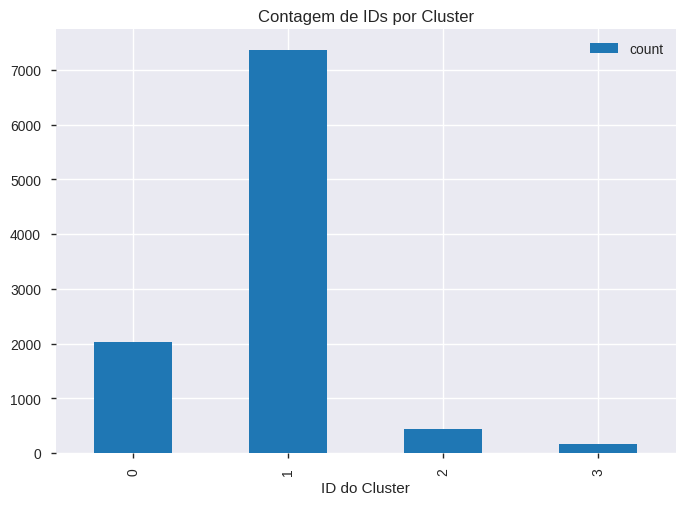

In [28]:
df_viz.plot.bar(x='cluster_id', y='count')
plt.style.use('seaborn')
plt.title('Contagem de IDs por Cluster')
plt.xlabel('ID do Cluster')
plt.show()

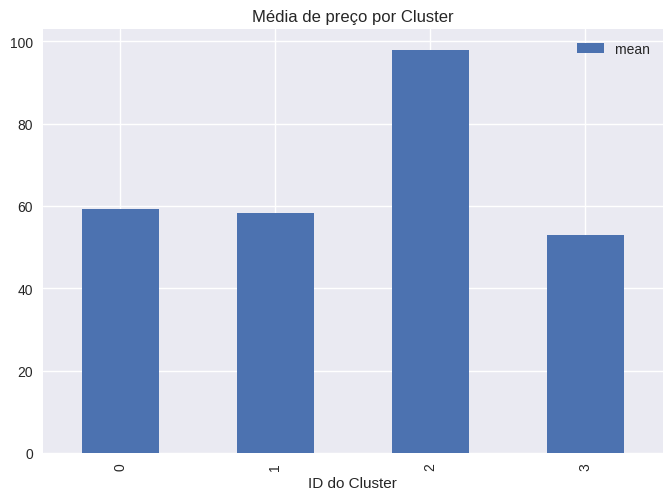

In [29]:
df_viz.plot.bar(x='cluster_id', y='mean')
plt.style.use('seaborn')
plt.title('Média de preço por Cluster')
plt.xlabel('ID do Cluster')
plt.show()

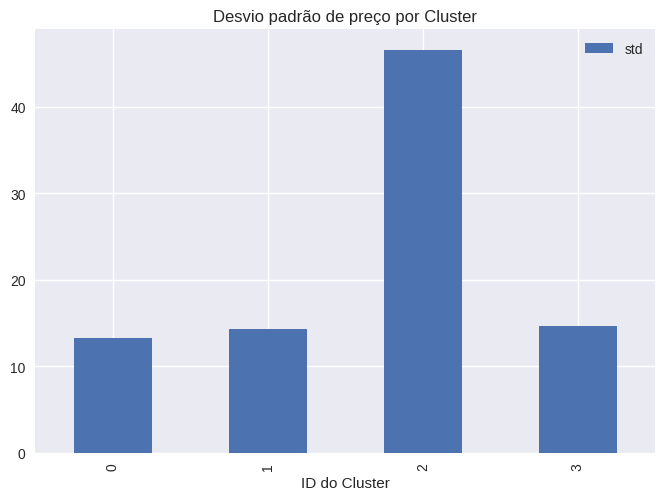

In [30]:
df_viz.plot.bar(x='cluster_id', y='std')
plt.style.use('seaborn')
plt.title('Desvio padrão de preço por Cluster')
plt.xlabel('ID do Cluster')
plt.show()